In [171]:
from __future__ import print_function, division
import os
import torch
from torch.optim.optimizer import Optimizer
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage import io
import torch.nn as nn
import torch.nn.functional as F

from skimage.color import rgb2gray

from torch.utils.tensorboard import SummaryWriter

import PIL
from PIL import Image

from google.colab import output

In [172]:
%mkdir results

mkdir: cannot create directory ‘results’: File exists


In [173]:
!git clone https://github.com/PauliusMilmantas/Bakalaurinis_darbas

fatal: destination path 'Bakalaurinis_darbas' already exists and is not an empty directory.


In [174]:
%cd /content/Bakalaurinis_darbas/Code

/content/Bakalaurinis_darbas/Code


In [175]:
import pandas as pd

duomenys = pd.read_csv('/content/Bakalaurinis_darbas/Code/diabetes.csv')
duomenys

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [176]:
import pandas as pd

class ORCDataset(Dataset):
  def __init__(self, root):
    self.root = root
    self.data = pd.read_csv(root)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    dat = {}
    dat['Pregnancies'] = self.data['Pregnancies'][idx]
    dat['Glucose'] = self.data['Glucose'][idx]
    dat['BloodPressure'] = self.data['BloodPressure'][idx]
    dat['BMI'] = self.data['BMI'][idx]
    dat['Age'] = self.data['Age'][idx]
    found_type = self.data['Outcome'][idx]

    return {'data': dat, 'class_name': found_type}

train_dataset = ORCDataset('/content/Bakalaurinis_darbas/Code/diabetes.csv')

In [177]:
class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)        
        out = self.relu2(out)     
        out = self.fc3(out)
        return out

2 <- 7 <- 15 <- 5

In [178]:
network = Net(5, 15, 7, 2)
optimizer = torch.optim.SGD(network.parameters(), lr=0.0001, momentum=0.6)
criterion = nn.MSELoss().cuda()

print(network)

Net(
  (fc1): Linear(in_features=5, out_features=15, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=15, out_features=7, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=7, out_features=2, bias=True)
)


In [179]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
network.to(dev)
criterion.to(dev)
dev

device(type='cpu')

In [180]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [181]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = len(train_dataset),shuffle=True)

In [182]:
dataiter = iter(train_loader)
itr = dataiter.next()

label = itr['class_name']
dat = itr['data']
print("Class name: {} Data: [Pregnancies: {} Glucose: {} BloodPressure: {} BMI: {} Age: {}]".format(label[0], dat['Pregnancies'][0], dat['Glucose'][0], dat['BloodPressure'][0], dat['BMI'][0], dat['Age'][0]))

Class name: 0 Data: [Pregnancies: 2 Glucose: 100 BloodPressure: 64 BMI: 29.7 Age: 21]


In [183]:
for data in train_loader:
  parsedData = []
  for dictIdx in range(len(dat)):
    parsedData.append([dat['Pregnancies'][dictIdx], dat['Glucose'][dictIdx], dat['BloodPressure'][dictIdx], dat['BMI'][dictIdx], dat['Age'][dictIdx]])

  print(torch.Tensor(parsedData))

tensor([[  2.0000, 100.0000,  64.0000,  29.7000,  21.0000],
        [  1.0000, 196.0000,  76.0000,  36.5000,  29.0000],
        [  3.0000, 112.0000,  74.0000,  31.6000,  25.0000],
        [  3.0000, 169.0000,  74.0000,  29.9000,  31.0000],
        [  9.0000, 145.0000,  80.0000,  37.9000,  40.0000]])


Epoch: 0 Training loss: 122.233886654299
Epoch: 1 Training loss: 120.85241040138862
Epoch: 2 Training loss: 121.35908464640943
Epoch: 3 Training loss: 118.31413004250953
Epoch: 4 Training loss: 120.2616313997114
Epoch: 5 Training loss: 120.62448369607364
Epoch: 6 Training loss: 120.77594803312968
Epoch: 7 Training loss: 120.0603860825031
Epoch: 8 Training loss: 121.07719222256355
Epoch: 9 Training loss: 120.48931637906207
Epoch: 10 Training loss: 120.14098691336358
Epoch: 11 Training loss: 120.3935873949415
Epoch: 12 Training loss: 120.71107430059897
Epoch: 13 Training loss: 120.2328748240252
Epoch: 14 Training loss: 119.29734262689635
Epoch: 15 Training loss: 120.4286990726232
Epoch: 16 Training loss: 120.80641360536106
Epoch: 17 Training loss: 119.39276361325938
Epoch: 18 Training loss: 119.80506729770514
Epoch: 19 Training loss: 120.86649559786201


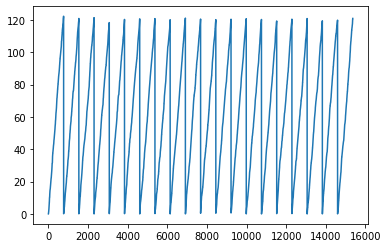

In [189]:
def train(train_loader, epoch_amount, save_checkpoint = 10):
  network.eval()
  train_loss_hist = []

  checkpoint = save_checkpoint
  for epoch in range(epoch_amount):
    num_data_train = 0

    # TRAINING DATASET
    correct = 0
    for data in train_loader:
      labels = torch.from_numpy(np.array(data['class_name']))
      dat = data['data']

      lossSum = 0
      
      parsedData = []
      for dictIdx in range(len(labels)):
        parsedData.append(
            np.array([dat['Pregnancies'][dictIdx].float(), dat['Glucose'][dictIdx].float(), dat['BloodPressure'][dictIdx].float(), dat['BMI'][dictIdx].float(), dat['Age'][dictIdx].float()])
            )

      for idx in range(len(labels)):
        optimizer.zero_grad()

        outputs = network(torch.Tensor(parsedData[idx].flatten()))
        realAnswer = [0, 0]
        realAnswer[labels[idx]] = 1

        loss = criterion(outputs, torch.Tensor(realAnswer))
          
        loss.backward()

        lossSum += loss.item()
        train_loss_hist.append(lossSum)

        optimizer.step()

    print("Epoch: {} Training loss: {}".format(epoch,train_loss_hist[len(train_loss_hist) - 1]))
    
    if(checkpoint == 0):
      torch.save(network.state_dict(), '/content/results/model.pth')
      torch.save(optimizer.state_dict(), '/content/results/optimizer.pth')

      checkpoint = save_checkpoint
    else:
      checkpoint -= 1

  plt.plot(np.arange(0, len(train_loss_hist), 1), train_loss_hist)
  plt.show()

train(train_loader, 20)
